<a href="https://colab.research.google.com/github/MMENDONNCA/controle_fuzzy/blob/main/AP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Variáveis

In [ ]:
temp = ctrl.Antecedent(np.arange(0, 60, .01), 'Temperatura')
umi = ctrl.Antecedent(np.arange(0, 100, .01), 'Umidade')

irrig=ctrl.Consequent(np.arange(0, 100, .01), 'Irrigação')

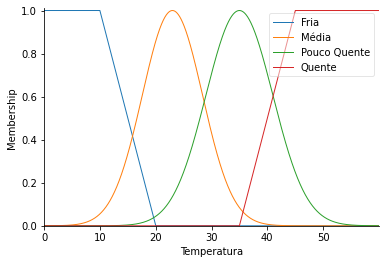

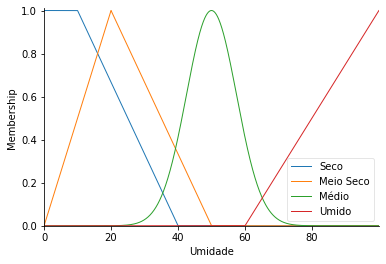

In [ ]:
temp['Fria'] = fuzz.trapmf(temp.universe, [0, 0, 10, 20])
temp['Média'] = fuzz.gaussmf(temp.universe, 23, 5.4)
temp['Pouco Quente'] = fuzz.gaussmf(temp.universe, 35, 6)
temp['Quente'] = fuzz.trapmf(temp.universe, [35, 45, 60, 60])

umi['Seco'] = fuzz.trapmf(umi.universe, [0, 0, 10, 40])
umi['Meio Seco'] = fuzz.trimf(umi.universe, [0, 20, 50])
umi['Médio'] = fuzz.gaussmf(umi.universe, 50, 7.5)
umi['Umido'] = fuzz.trimf(umi.universe, [60, 100, 100])

temp.view()
umi.view()

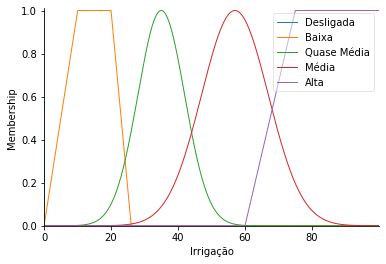

In [ ]:
irrig['Desligada'] = fuzz.trapmf(irrig.universe, [0,0, 0, 0])
irrig['Baixa'] = fuzz.trapmf(irrig.universe, [0, 10, 20, 26])
irrig['Quase Média'] = fuzz.gaussmf(irrig.universe, 35, 7)
irrig['Média'] = fuzz.gaussmf(irrig.universe, 57, 10)
irrig['Alta'] = fuzz.trapmf(irrig.universe, [60, 75, 100, 100])

irrig.view()

# Regras

In [ ]:
rule1 = ctrl.Rule(temp['Fria'] & umi['Seco'], irrig['Média'] )
rule2 = ctrl.Rule(temp['Fria'] & umi['Meio Seco'], irrig['Quase Média'] )
rule3 = ctrl.Rule(temp['Fria'] & umi['Médio'], irrig['Baixa'] )
rule4 = ctrl.Rule(temp['Fria'] & umi['Umido'], irrig['Desligada'] )
rule5 = ctrl.Rule(temp['Média'] & umi['Seco'], irrig['Alta'] )
rule6 = ctrl.Rule(temp['Média'] & umi['Meio Seco'], irrig['Média'] )
rule7 = ctrl.Rule(temp['Média'] & umi['Médio'], irrig['Quase Média'] )
rule8 = ctrl.Rule(temp['Média'] & umi['Umido'], irrig['Baixa'] )
rule9 = ctrl.Rule(temp['Pouco Quente'] & umi['Seco'], irrig['Alta'] )
rule10 = ctrl.Rule(temp['Pouco Quente'] & umi['Meio Seco'], irrig['Média'] )
rule11 = ctrl.Rule(temp['Pouco Quente'] & umi['Médio'], irrig['Quase Média'] )
rule12 = ctrl.Rule(temp['Pouco Quente'] & umi['Umido'], irrig['Quase Média'] )
rule13 = ctrl.Rule(temp['Quente'] & umi['Seco'], irrig['Alta'] )
rule14 = ctrl.Rule(temp['Quente'] & umi['Meio Seco'], irrig['Alta'] )
rule15 = ctrl.Rule(temp['Quente'] & umi['Médio'], irrig['Alta'] )
rule16 = ctrl.Rule(temp['Quente'] & umi['Umido'], irrig['Média'] )





In [ ]:
retorno_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9, rule10, rule11,rule12,rule13,rule14,rule15, rule16])
retorno_simul = ctrl.ControlSystemSimulation(retorno_ctrl)

OrderedDict([('Irrigação', 18.03452959288029)])


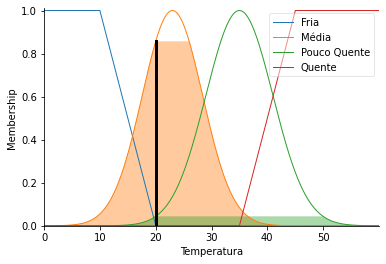

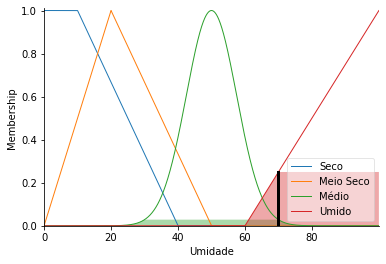

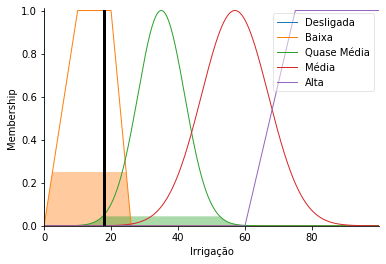

In [ ]:
retorno_simul.input['Temperatura'] = 20.0
retorno_simul.input['Umidade'] = 70.0
retorno_simul.compute()
print(retorno_simul.output)
temp.view(sim=retorno_simul)
umi.view(sim=retorno_simul)
irrig.view(sim=retorno_simul)

# Visualização

In [ ]:
upsampled = np.linspace(0, 100, 21)
x, y = np.meshgrid(upsampled, upsampled)

z = np.zeros_like(x)

for i in range(21):
    for j in range(21):

        retorno_simul.input['Temperatura'] =  x[i, j]
        retorno_simul.input['Umidade'] = y[i, j]
        retorno_simul.compute()
        z[i, j] = retorno_simul.output['Irrigação']

fig1 = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig1.update_layout(title='Resposta Sistema de Irrigação', autosize=True,
                  width=700, height=700,
                  margin=dict(l=100, r=100, b=100, t=100))
fig1.update_traces(contours_x=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_x=True))
fig1.update_traces(contours_y=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_y=True))
fig1.update_layout(
    scene = dict(
        xaxis = dict(nticks=10, range=[0,50],),
                     yaxis = dict(nticks=10, range=[0,100],),
                     zaxis = dict(nticks=10, range=[0,100],),))

fig1.update_layout(scene = dict(
                    xaxis_title='Temperatura',
                    yaxis_title='Umidade',
                    zaxis_title='Irrigação'))

